# LivreQuanti2023: Writer Identification

Ce document exploite les données de l'entrepôt https://github.com/oriflamms/RegVat_ArchNatJJ_MOM_LBA_2019 correspondant aux publications : 

## Références

Article
* Stutzmann, Dominique, « Les écritures de la chancellerie pontificale dans le paysage européen (XIIe -XVe siècles) ». ed. O. Guyotjeannin, R. Große,  Les actes pontificaux. Un trésor à exploiter, sous presse

Données 
* Stutzmann, Dominique. (2022). Handwriting of the papal chancery and beyond: Dataset [Data set]. Les actes pontificaux : un trésor à exploiter, Paris, France. Zenodo. https://doi.org/10.5281/zenodo.5805652 


## Environnement

In [52]:
# Install and import the required packages

!pip install plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from plotly.offline import plot
import plotly.graph_objs as go
import seaborn as sns
import plotly.express as px

## Données

In [53]:
# Load data files
# Read the CSV file with specified column data types
column_dtypes = {**{f"V{i}": str for i in range(0)}, **{f"V{i}": int for i in range(1, 3072)}, **{f"V{i}": str for i in range(3073, 3077)}}
rvat = pd.read_csv("../data/WriterIdentification/DHIP.rvat4_8.csv", sep=",", dtype=column_dtypes, low_memory=False)
print(rvat.shape)
print(rvat.head())

(1914, 3078)
        Unnamed: 0        D0     D1     D2     D3     D4   D5     D6     D7  \
0  RVAT4_00001.jpg  14283436  32873   7623  15534  14828  126   8971   8316   
1  RVAT4_00002.jpg  13584675  51349  15708  37682  36624  241  34703  27512   
2  RVAT4_00003.jpg  13741834  36193  11600  32443  27292  200  27967  26121   
3  RVAT4_00004.jpg  13521816  47762  14795  37860  36741  435  32885  32928   
4  RVAT4_00005.jpg  13830374  28539   8753  25447  23963  363  24173  24080   

      D8  ...  D3067  D3068  D3069  D3070  D3071  Corpus  Volume  Date  Type1  \
0   7368  ...   3381   1198   1033   1983  12637    RVAT   RVAT4  1199    NaN   
1  17862  ...  33232   6164  15669  23429  57500    RVAT   RVAT4  1199    NaN   
2  14750  ...  37477   5843  17542  16825  35747    RVAT   RVAT4  1199    NaN   
3  17327  ...  35913   5378  17474  18724  47689    RVAT   RVAT4  1199    NaN   
4  11325  ...  37422   4939  18966  20779  64632    RVAT   RVAT4  1199    NaN   

      Main  
0  4_Table  

## TSNE

In [68]:
%%time
# Set seed
seed = 4000

# Set the parameters
tsne = TSNE(n_components=2,
            perplexity=10,
            early_exaggeration=30,
            init='pca',
            learning_rate=10,
            n_iter=1000,
            verbose=0,
            # angle=0.0,
            # method='barnes_hut', 
            method='exact', 
            random_state=seed)

# Perform t-SNE

rvat_tsne = tsne.fit_transform(rvat.iloc[:, 1:3073])



# Create a DataFrame with t-SNE results and additional columns
rvat_tsne_df = pd.DataFrame(rvat_tsne, columns=["x", "y"])
rvat_tsne_df["Volume"] = rvat["Volume"]
rvat_tsne_df["Hand"] = rvat["Main"]
rvat_tsne_df["Text"] = rvat.index



CPU times: user 49.4 s, sys: 5.43 s, total: 54.9 s
Wall time: 46.1 s


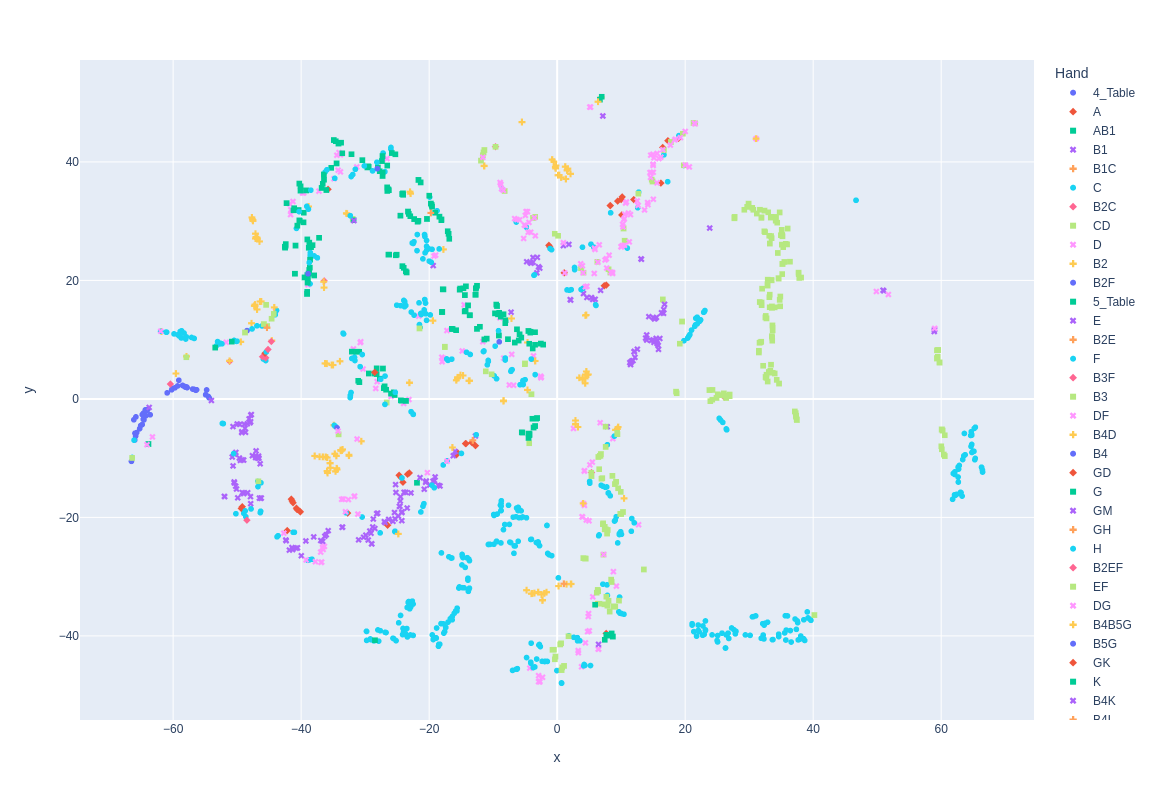

In [67]:
# Visualize t-SNE using Plotly
fig = px.scatter(rvat_tsne_df, x="x", y="y", color="Hand", symbol="Hand")
fig.update_traces(textposition='top center')

# Increase the size of the figure
fig.update_layout(height=800, width=1000)

# Save the Plotly visualization as an HTML page
fig.write_html("RVAT_008_plotly_rtnse.html")

# Display the Plotly visualization
fig.show()
